# First Project: Impact of Weather on Crime in Austin
### *By The Icemen*
Question: *How do weather conditions impact the likelihood of different types of crime?*

## Setup

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from pprint import pprint
from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database
import data
import example_dark_sky

# Choose date range to retrieve data
start_str = "2018-01-01"
end_str = "2019-12-31"

# Choose methods of getting/saving data
crime_previously_saved = True
weather_previously_saved = True
in_db = True

# Choose file paths for saving/loading
crime_path = "data/crime.csv"
weather_path = "data/weather.csv"

## API Data

### Austin Crime: Somewhat Straightforward

See data frame below

### Dark Sky: Somewhat Complicated

In [2]:
# Display example JSON from a Dark Sky response
pprint(example_dark_sky.json)

{'currently': {'apparentTemperature': 38.13,
               'cloudCover': 0.26,
               'dewPoint': 35,
               'humidity': 0.68,
               'icon': 'clear-day',
               'ozone': 312.8,
               'precipIntensity': 0,
               'precipProbability': 0,
               'pressure': 1023.7,
               'summary': 'Clear',
               'temperature': 44.92,
               'time': 1578760316,
               'uvIndex': 2,
               'visibility': 10,
               'windBearing': 324,
               'windGust': 25.12,
               'windSpeed': 14.98},
 'daily': {'data': [{'apparentTemperatureHigh': 55.36,
                     'apparentTemperatureHighTime': 1578777300,
                     'apparentTemperatureLow': 31.07,
                     'apparentTemperatureLowTime': 1578830940,
                     'apparentTemperatureMax': 56.53,
                     'apparentTemperatureMaxTime': 1578722400,
                     'apparentTemperatureMin': 36.1

### Retrieve Austin Crime Data (data.austintexas.gov)

In [3]:
if crime_previously_saved:
    # load from saved file
    df_crime = pd.read_csv(crime_path)
else:
    # call from API
    df_crime = data.get_crime_data(start_str, end_str)
    df_crime.to_csv(crime_path, index=False)

df_crime

,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2018-01-01T00:05:00.000,201810032,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,2018-01-01T00:00:00.000,RESIDENCE / HOME,78701.0,NaN,NaN,1514786400
1,2018-01-01T00:09:00.000,201810042,DWI,2100,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78748.0,NaN,NaN,1514786400
2,2018-01-01T00:10:00.000,201810047,THEFT OF SERVICE,608,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78723.0,NaN,NaN,1514786400
3,2018-01-01T00:10:00.000,201810043,DOC DISCHARGE GUN - PUB PLACE,2408,N,2018-01-01T00:00:00.000,OTHER / UNKNOWN,78721.0,NaN,NaN,1514786400
4,2018-01-01T00:13:00.000,20185000001,VIOL OF EMERG PROTECTIVE ORDER,3008,N,2017-12-31T00:00:00.000,RESIDENCE / HOME,78750.0,NaN,NaN,1514786400
...,...,...,...,...,...,...,...,...,...,...,...
210220,2019-12-31T23:37:00.000,20193652135,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78727.0,NaN,NaN,1577854800
210221,2019-12-31T23:42:00.000,20193652146,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701.0,NaN,NaN,1577854800
210222,2019-12-31T23:47:00.000,20193651961,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-12-31T00:00:00.000,GAS / SERVICE STATIONS,78752.0,NaN,NaN,1577854800
210223,2019-12-31T23:58:00.000,20193651731,RUNAWAY CHILD,4100,N,2019-12-31T00:00:00.000,OTHER / UNKNOWN,78704.0,NaN,NaN,1577854800


### Retrieve Weather Data

In [4]:
if weather_previously_saved:
    # load from saved file
    df_weather = pd.read_csv(weather_path)
else:
    # call from API
    df_weather = data.get_weather_data(start_str, end_str)
    df_weather.to_csv(weather_path, index=False)

df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed,Moon Phase
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,26.54,0,9.997,8.0,8.08,0.50
1,1514790000,18.43,1.00,19.40,0.75,cloudy,0.0,0.0,1038.3,Overcast,26.27,0,9.997,8.0,7.21,0.50
2,1514793600,17.99,1.00,19.40,0.75,cloudy,0.0,0.0,1038.7,Overcast,26.27,0,9.997,2.0,7.82,0.50
3,1514797200,18.86,1.00,15.91,0.65,cloudy,0.0,0.0,1039.0,Overcast,26.09,0,9.997,351.0,6.39,0.50
4,1514800800,18.38,1.00,15.23,0.63,cloudy,0.0,0.0,1039.3,Overcast,26.09,0,9.997,2.0,6.99,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,1577840400,51.59,0.66,23.58,0.33,partly-cloudy-night,0.0,0.0,1021.8,Mostly Cloudy,51.59,0,10.000,126.0,0.73,0.19
17516,1577844000,52.53,0.65,26.83,0.37,partly-cloudy-night,0.0,0.0,1021.7,Mostly Cloudy,52.53,0,10.000,134.0,0.73,0.19
17517,1577847600,50.80,0.92,27.21,0.40,cloudy,0.0,0.0,1021.5,Overcast,50.80,0,10.000,148.0,4.24,0.19
17518,1577851200,50.34,0.62,27.46,0.41,partly-cloudy-night,0.0,0.0,1021.4,Mostly Cloudy,50.34,0,10.000,143.0,3.17,0.19


## Merge Data Sources

In [5]:
df_result = pd.merge(
    df_weather,
    df_crime,
    left_on="Date",
    right_on="Epoch",
    how="outer"
)
df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,ASSAULT W/INJURY-FAM/DATE VIOL,900.0,Y,2018-01-01T00:00:00.000,RESIDENCE / HOME,78701.0,NaN,NaN,1.514786e+09
1,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,DWI,2100.0,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78748.0,NaN,NaN,1.514786e+09
2,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,THEFT OF SERVICE,608.0,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78723.0,NaN,NaN,1.514786e+09
3,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,DOC DISCHARGE GUN - PUB PLACE,2408.0,N,2018-01-01T00:00:00.000,OTHER / UNKNOWN,78721.0,NaN,NaN,1.514786e+09
4,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018500e+10,VIOL OF EMERG PROTECTIVE ORDER,3008.0,N,2017-12-31T00:00:00.000,RESIDENCE / HOME,78750.0,NaN,NaN,1.514786e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210300,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,DWI,2100.0,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78727.0,NaN,NaN,1.577855e+09
210301,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,DWI,2100.0,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701.0,NaN,NaN,1.577855e+09
210302,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,CRASH/FAIL STOP AND RENDER AID,3604.0,N,2019-12-31T00:00:00.000,GAS / SERVICE STATIONS,78752.0,NaN,NaN,1.577855e+09
210303,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,RUNAWAY CHILD,4100.0,N,2019-12-31T00:00:00.000,OTHER / UNKNOWN,78704.0,NaN,NaN,1.577855e+09


# Store in a database

In [6]:
if not in_db:
    obj_database = Database()
    obj_database.df_save(df_result)

## Data Visualizations

#### Crime Rate vs. Temperature by Crime Type

In [7]:
temp_df = df_result[["Temperature", "Crime Type", "Date"]]
temp_df

,Temperature,Crime Type,Date
0,26.54,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,26.54,DWI,1514786400
2,26.54,THEFT OF SERVICE,1514786400
3,26.54,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,26.54,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210300,50.05,DWI,1577854800
210301,50.05,DWI,1577854800
210302,50.05,CRASH/FAIL STOP AND RENDER AID,1577854800
210303,50.05,RUNAWAY CHILD,1577854800


In [8]:
# Top 5 Crime Types
top5_crime_types = temp_df["Crime Type"].value_counts().sort_values(ascending=False).head()
top5_crime_types

BURGLARY OF VEHICLE               22316
FAMILY DISTURBANCE                21059
THEFT                             19035
CRIMINAL MISCHIEF                 10194
ASSAULT W/INJURY-FAM/DATE VIOL     6817
Name: Crime Type, dtype: int64

In [9]:
# Create temperature bins
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 109.99, 119.99, 9999]
temp_ranges = ["<0", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", ">120"]
temp_df["Temperature Group"] = pd.cut(temp_df["Temperature"], bins, labels = temp_ranges)
# df_1

C:\Users\eanor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# Filter for top 5 crime types
df_top5_crime_types = temp_df[temp_df["Crime Type"].apply(lambda x: x in top5_crime_types.index)]
# df_top5_crime_types

# Group by temperature bin to get hour counts
by_temp = df_top5_crime_types.groupby("Temperature Group")
hour_counts = by_temp["Date"].nunique()

# Group by temperature and crime type to get crime counts
df_group1 = df_top5_crime_types.groupby(["Crime Type", "Temperature Group"])["Date"]
crime_counts = df_group1.count()

# Calculate crime rates as crimes / hours within each temp bin
crime_rates = crime_counts / hour_counts

# Format DF
crime_rates_df = crime_rates.to_frame().reset_index().rename(columns={"Date": "Crime Rate"})
crime_rates_df

,Crime Type,Temperature Group,Crime Rate
0,ASSAULT W/INJURY-FAM/DATE VIOL,20-29,0.333333
1,ASSAULT W/INJURY-FAM/DATE VIOL,30-39,0.343899
2,ASSAULT W/INJURY-FAM/DATE VIOL,40-49,0.374925
3,ASSAULT W/INJURY-FAM/DATE VIOL,50-59,0.393826
4,ASSAULT W/INJURY-FAM/DATE VIOL,60-69,0.399275
5,ASSAULT W/INJURY-FAM/DATE VIOL,70-79,0.404480
6,ASSAULT W/INJURY-FAM/DATE VIOL,80-89,0.480281
7,ASSAULT W/INJURY-FAM/DATE VIOL,90-99,0.484327
8,ASSAULT W/INJURY-FAM/DATE VIOL,100-109,0.492188
9,BURGLARY OF VEHICLE,10-19,0.500000


In [11]:
legend_values = crime_rates_df["Crime Type"].drop_duplicates()
legend_values

0     ASSAULT W/INJURY-FAM/DATE VIOL
9                BURGLARY OF VEHICLE
19                 CRIMINAL MISCHIEF
28                FAMILY DISTURBANCE
38                             THEFT
Name: Crime Type, dtype: object

In [12]:
# Pivoting results dataframe
df_pivot1 = pd.pivot_table(crime_rates_df, values=["Crime Rate"], index=["Temperature Group"],
                   columns=["Crime Type"]).fillna(0)

df_pivot1

Crime Rate                      \
Crime Type        ASSAULT W/INJURY-FAM/DATE VIOL BURGLARY OF VEHICLE   
Temperature Group                                                      
10-19                                   0.000000            0.500000   
20-29                                   0.333333            0.872549   
30-39                                   0.343899            1.147385   
40-49                                   0.374925            1.286143   
50-59                                   0.393826            1.355861   
60-69                                   0.399275            1.316667   
70-79                                   0.404480            1.197584   
80-89                                   0.480281            1.648061   
90-99                                   0.484327            1.615857   
100-109                                 0.492188            1.218750   

                                                                  
Crime Type        CRIMINAL MISCHIEF FAMILY DISTURBANCE     THEFT  
Temperature Group                                                 
10-19                      0.000000           0.500000  0.500000  
20-29                      0.421569           1.009804  0.725490  
30-39                      0.486529           1.031696  0.805071  
40-49                      0.544091           1.211758  0.949610  
50-59                      0.600751           1.295786  1.076763  
60-69                      0.593841           1.285870  1.159058  
70-79                      0.571608           1.188019  0.998742  
80-89                      0.740976           1.464906  1.379345  
90-99                      0.786724           1.422250  1.708666  
100-109                    0.703125           1.656250  1.671875

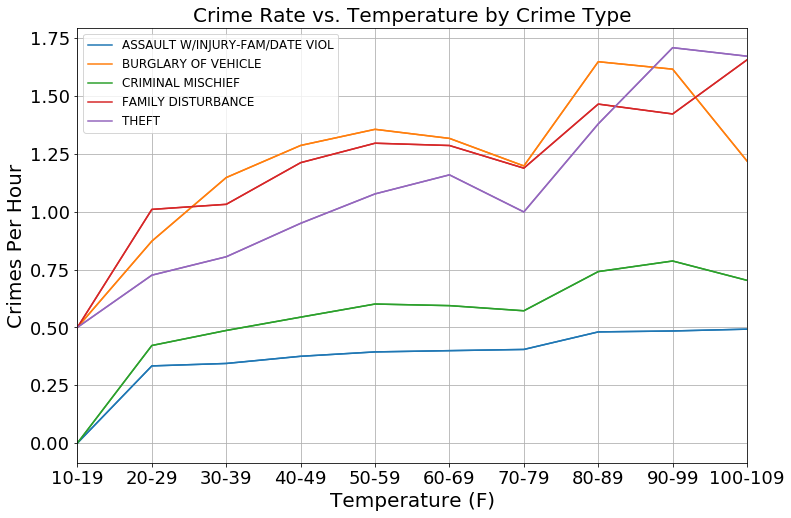

In [13]:
ax = df_pivot1.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot1.plot(figsize=(12,8), ax = ax, grid=True)
plt.title("Crime Rate vs. Temperature by Crime Type", fontsize=20)
plt.legend(legend_values, fontsize=12)
plt.xlabel("Temperature (F)", fontsize=20)
plt.ylabel("Crimes Per Hour", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Type vs. Moon Phase

In [14]:
moon_df = df_result[["Moon Phase", "Crime Type", "Date"]]
moon_df

,Moon Phase,Crime Type,Date
0,0.50,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,0.50,DWI,1514786400
2,0.50,THEFT OF SERVICE,1514786400
3,0.50,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,0.50,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210300,0.19,DWI,1577854800
210301,0.19,DWI,1577854800
210302,0.19,CRASH/FAIL STOP AND RENDER AID,1577854800
210303,0.19,RUNAWAY CHILD,1577854800


In [15]:
# Change moon phases to categories
obj_weather = Weather()
moon_df.loc[:, "Moon Phase"] = moon_df.loc[:, "Moon Phase"].apply(obj_weather.get_moon_description)
moon_df

C:\Users\eanor\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Moon Phase,Crime Type,Date
0,Full Moon,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,Full Moon,DWI,1514786400
2,Full Moon,THEFT OF SERVICE,1514786400
3,Full Moon,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,Full Moon,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210300,New Moon,DWI,1577854800
210301,New Moon,DWI,1577854800
210302,New Moon,CRASH/FAIL STOP AND RENDER AID,1577854800
210303,New Moon,RUNAWAY CHILD,1577854800


In [16]:
moon_df["Moon Phase"].value_counts()

Full Moon             54120
Last Quarter Moon     53665
First Quarter Moon    51515
New Moon              51005
Name: Moon Phase, dtype: int64

In [17]:
# Filter for top 5 crime location types
df_top5_crime_types = moon_df[moon_df["Crime Type"].apply(lambda x: x in top5_crime_types.index)]

# Group by temperature bin to get hour counts
by_phase = df_top5_crime_types.groupby("Moon Phase")
hour_counts = by_phase["Date"].nunique()

# Group by moon phase and crime type to get crime counts
df_group2 = df_top5_crime_types.groupby(["Crime Type", "Moon Phase"])["Date"]
crime_counts = df_group2.count()

# Calculate crime rates as crimes / hours within each moon phase
crime_rates2 = crime_counts / hour_counts

# DF
df_crime_rates2 = crime_rates2.to_frame().reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates2

KeyboardInterrupt: 

In [ ]:
legend_values = df_crime_rates2["Crime Type"].drop_duplicates()
legend_values

In [ ]:
df_pivot2 = pd.pivot_table(df_crime_rates2, values=["Crime Rate"], index=["Moon Phase"],
                   columns=["Crime Type"]).fillna(0)

df_pivot2

In [ ]:
ax = df_pivot2.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot2.plot(figsize=(12,8), ax = ax, grid=True)
plt.title("Crime Rate vs. Moon Phase by Crime Type", fontsize=20)
plt.legend(legend_values, fontsize=12)
plt.xlabel("Moon Phase", fontsize=18)
plt.ylabel("Crimes Per Hour", fontsize=20)
plt.tick_params(labelsize=10)

#### Crime Rate vs. Precipitation Intensity by Crime Location

In [ ]:
precip_df = df_result[["Precipitation Intensity", "Location Type", "Date"]]
precip_df

In [ ]:
# Top 5 Crime Types
top5_crime_locations = precip_df["Location Type"].value_counts().sort_values(ascending=False).head()
top5_crime_locations

In [ ]:
# View precipitation intensity range
min(precip_df["Precipitation Intensity"]), max(precip_df["Precipitation Intensity"])

In [ ]:
# Create bins
labels = ['0-.0689', '.0689-.138', '.138-.207', '.207-.276', '.276-.345', '.345-.413', '.413-.482', '.482-.551', '.551-.620', '.620-.689']
precip_df["Precipitation Intensity"] = pd.cut(precip_df["Precipitation Intensity"], 10, labels=labels)
precip_df["Precipitation Intensity"].drop_duplicates()

In [ ]:
# Filter for top 5 location types
df_top5_location_types = precip_df[precip_df["Location Type"].apply(lambda x: x in top5_crime_locations.index)]

# Group by precipitation intensity to get hour counts
by_precip = df_top5_location_types.groupby("Precipitation Intensity")
hour_counts = by_precip["Date"].nunique()

# Group by precipitation intensity and crime type to get crime counts
df_group3 = df_top5_location_types.groupby(["Location Type", "Precipitation Intensity"])["Date"]
crime_counts = df_group3.count()

# Calculate crime rates as crimes / hours within each precip. intensity bin
crime_rates3 = crime_counts / hour_counts

# DF
df_crime_rates3 = crime_rates3.to_frame().reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates3

In [ ]:
legend3 = df_crime_rates3["Location Type"].drop_duplicates()
legend3

In [ ]:
df_pivot3 = pd.pivot_table(df_crime_rates3, values=["Crime Rate"], index =["Precipitation Intensity"],
                   columns=["Location Type"]).fillna(0)

df_pivot3

In [ ]:
ax = df_pivot3.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot3.plot(figsize=(12,8), ax = ax, grid=True)
plt.title("Crime Rate vs. Precipitation Intensity by Location Type", fontsize=20)
plt.legend(legend3, fontsize=12)
plt.xlabel("Precipitation Intensity (in/h)", fontsize=20)
plt.ylabel("Crimes Per Hour", fontsize=20)
plt.tick_params(labelsize=10)

## Written Analysis and Conclusions

Refer to ReadMe for analysis.